In [164]:
## Test the free surface condition of Aniplane.jl by comparing the waveforms produced using models with a free surface and the ones with an "air layer" on the top

using Base
using Plots

include("../src/ModelOperations.jl")
include("../src/WavePropagation.jl")

getshresp (generic function with 1 method)

In [165]:
## Input parameters

path_sol = "./isotropic_crust.dat"
path_air = "./isotropic_air.dat"

rho_sol = 2.8
rho_air = 0.001

minrayp = 0.01
maxrayp = 0.08
numrayp = 50

50

In [166]:
## Read the Voigt matrices

mat_sol, _ = readvoigtmatrix(path_sol)
mat_air, _ = readvoigtmatrix(path_air)

tsr_sol = voigt2tensor(mat_sol)
tsr_air = voigt2tensor(mat_air)

3×3×3×3 Array{Float64, 4}:
[:, :, 1, 1] =
 0.0001  0.0     0.0
 0.0     6.0e-5  0.0
 0.0     0.0     6.0e-5

[:, :, 2, 1] =
 0.0     0.0002  0.0
 0.0002  0.0     0.0
 0.0     0.0     0.0

[:, :, 3, 1] =
 0.0     0.0  0.0002
 0.0     0.0  0.0
 0.0002  0.0  0.0

[:, :, 1, 2] =
 0.0     0.0002  0.0
 0.0002  0.0     0.0
 0.0     0.0     0.0

[:, :, 2, 2] =
 6.0e-5  0.0     0.0
 0.0     0.0001  0.0
 0.0     0.0     6.0e-5

[:, :, 3, 2] =
 0.0  0.0     0.0
 0.0  0.0     0.0002
 0.0  0.0002  0.0

[:, :, 1, 3] =
 0.0     0.0  0.0002
 0.0     0.0  0.0
 0.0002  0.0  0.0

[:, :, 2, 3] =
 0.0  0.0     0.0
 0.0  0.0     0.0002
 0.0  0.0002  0.0

[:, :, 3, 3] =
 6.0e-5  0.0     0.0
 0.0     6.0e-5  0.0
 0.0     0.0     6.0e-5

In [167]:
## Compute the ref-trans coefficients for each rayp

# Define the ray-parameter vector
list_rayp = range(minrayp, maxrayp, length=numrayp)

list_p2p_sur = zeros(numrayp)
list_p2sv_sur = zeros(numrayp)
list_sv2p_sur = zeros(numrayp)
list_sv2sv_sur = zeros(numrayp)
list_sh2sh_sur = zeros(numrayp)

list_p2p_air = zeros(numrayp)
list_p2sv_air = zeros(numrayp)
list_sv2p_air = zeros(numrayp)
list_sv2sv_air = zeros(numrayp)
list_sh2sh_air = zeros(numrayp)

for ind in range(1, numrayp)
    rayp = list_rayp[ind]
    println(rayp)

    _, _, mat_dsst_sol, _ = geteigenval(tsr_sol, rayp, rho_sol, [0; 0; 0])
    _, _, mat_dsst_air, _ = geteigenval(tsr_air, rayp, rho_air, [0; 0; 0])

    # Compute the free-surface ref-trans coefficients 
    mat_ref = getfreesurfmat(mat_dsst_sol)
    p2p = real(mat_ref[1, 1])
    p2sv = real((mat_ref[2, 1]))
    sv2p = real((mat_ref[1, 2]))
    sv2sv = real(abs(mat_ref[2, 2]))
    sh2sh = real(abs(mat_ref[3, 3]))

    list_p2p_sur[ind] = p2p
    list_p2sv_sur[ind] = p2sv
    list_sv2p_sur[ind] = sv2p
    list_sv2sv_sur[ind] = sv2sv
    list_sh2sh_sur[ind] = sh2sh

    # Compute the solid-air ref-trans coefficients
    _, _, mat_ref, _ = getreftransmats(mat_dsst_air, mat_dsst_sol)
    p2p = abs(mat_ref[1, 1])
    p2sv = abs(mat_ref[2, 1])
    sv2p = abs(mat_ref[1, 2])
    sv2sv = abs(mat_ref[2, 2])
    sh2sh = abs(mat_ref[3, 3])

    list_p2p_air[ind] = p2p
    list_p2sv_air[ind] = p2sv
    list_sv2p_air[ind] = sv2p
    list_sv2sv_air[ind] = sv2sv
    list_sh2sh_air[ind] = sh2sh
end


0.01
0.011428571428571429
0.012857142857142857
0.014285714285714285
0.015714285714285715
0.017142857142857144
0.018571428571428572
0.02
0.02142857142857143
0.022857142857142857
0.024285714285714285
0.025714285714285714
0.027142857142857142
0.02857142857142857
0.03
0.03142857142857143
0.032857142857142856
0.03428571428571429
0.03571428571428571
0.037142857142857144
0.03857142857142857
0.04
0.041428571428571426
0.04285714285714286
0.04428571428571428
0.045714285714285714
0.047142857142857146
0.04857142857142857
0.05
0.05142857142857143
0.05285714285714286
0.054285714285714284
0.055714285714285716
0.05714285714285714
0.05857142857142857
0.06
0.06142857142857143
0.06285714285714286
0.06428571428571428
0.06571428571428571
0.06714285714285714
0.06857142857142857
0.07
0.07142857142857142
0.07285714285714286
0.07428571428571429
0.07571428571428572
0.07714285714285714
0.07857142857142857
0.08


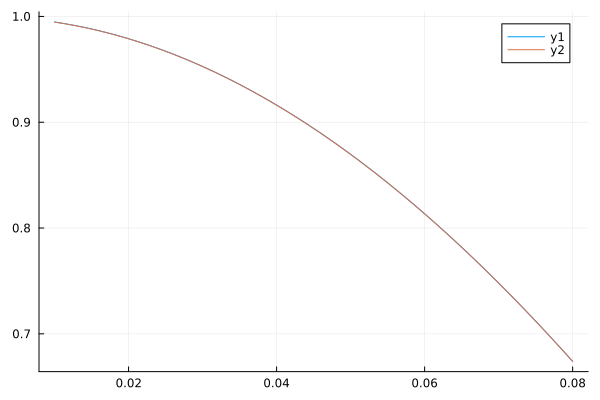

In [170]:
## Plot the results

plot(list_rayp, list_sv2sv_sur, show=true)
plot!(list_rayp, list_sv2sv_air, show=true)
# plot(list_rayp, list_sh2sh_sur, ylimits = [-1., 1.], show=true)
# plot!(list_rayp, list_sh2sh_air, show=true)
# list_p2p_sur

In [169]:
mat_dsst_sh = [mat_dsst_sol[2, 3] mat_dsst_sol[2, 6]; mat_dsst_sol[5, 3] mat_dsst_sol[5, 6]]
ref = getfreesurfmat_sh(mat_dsst_sh)

0.9999999999999993